In [13]:
%matplotlib inline
import numpy as np
import os.path as path
import os
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.image as mpimg
from skimage import io
import skimage
import datetime
import json
import base64
import cStringIO

In [16]:
class ImageTools:
    
    def __init__(self,resImageDir,resFile):
        """
        Construcor of  
        just produced half white half black image 
        """
        self.resImageDir = resImageDir
        self.resFile = resFile
        self.result = {}
        
    def toArray(self,imgFile):
        img = io.imread(imgFile)
        img = skimage.img_as_float(img)
        return img.tolist()
        #print imgFile
        #print out.shape
        
    def toBase64(self,imgFile):
        encoded_string = ''
        with open(imgFile, "rb") as image_file:
            encoded_string = base64.b64encode(image_file.read())
        return encoded_string 

    def toRef(self,imgFile):
        return imgFile.split('/')[-1]
         
    def getImgIdFromFileName(self,matfilename):
        id = matfilename.split('/')[-1].split('.')[0].split('_')[-1]
        return int(id)

    def convert(self):
        time_t = datetime.datetime.utcnow()
        imgfiles = os.listdir(self.resImageDir)
        for imgfname in imgfiles:
            imgFile = path.join(self.resImageDir,imgfname)
            id = self.getImgIdFromFileName(imgFile)
            self.result[id] = {u'image_id':id, 'saliency_map': self.toBase64(imgFile) }
        print len(self.result.keys()),'images converted','in %0.2fs'%((datetime.datetime.utcnow() - time_t).total_seconds())
        
      
    def dumpRes(self):
        time_t = datetime.datetime.utcnow()
        #anns = [{u'image_id':image_id,'saliency_map':res.tolist()} for image_id,res in self.result.items()]
        anns = self.result.values()
        with open(self.resFile, 'wb') as fp:
            json.dump(anns, fp)
        print 'DONE (t=%0.2fs)'%((datetime.datetime.utcnow() - time_t).total_seconds())       
    
    
    def showPrediction(self,image_id):
        salmapData = base64.b64decode(self.result[image_id]['saliency_map'])
        salmapFilelike = cStringIO.StringIO(salmapData)
        img = skimage.img_as_float(io.imread(salmapFilelike))
        print img.shape,img.dtype
        plt.imshow(img,cm.Greys_r,vmin = 0, vmax = 1)
        pass

10000 images converted in 1.26s
DONE (t=6.18s)
(480, 640) float64


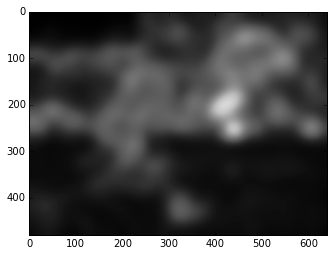

In [17]:
if __name__ == "__main__":
    sp = ImageTools('./sal/bms','train10k_result.json')
    sp.convert()
    sp.dumpRes()
    sp.showPrediction(226936)
